# Diabetes Prediction

**Content:**

Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

1. Pregnancies: Number of times pregnant,
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test,
3. BloodPressure: Diastolic blood pressure (mm Hg),
4. SkinThickness: Triceps skin fold thickness (mm),
5. Insulin: 2-Hour serum insulin (mu U/ml),
6. BMI: Body mass index (weight in kg/(height in m)^2),
7. DiabetesPedigreeFunction: Diabetes pedigree function,
8. Age: Age (years),
9. Outcome: Class variable (0 or 1)

In [1]:
#Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import pandas as pd
import scikitplot as skplt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
import xgboost as xgb 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("/kaggle/input/pima-indians-diabetes-database/diabetes.csv")

In [3]:
df.head() #printed first five rows

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape #checking number of rows and columns 

(768, 9)

# Data Preprocessing:

In [35]:
import pandas as pd

# Function to preprocess the data
def preprocess_data(df):
    # Use only the specified columns and drop the unnecessary ones
    columns_to_keep = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
    df = df[columns_to_keep]

    # Separate the features (X) and target variable (y)
    X = df.drop(columns=['Outcome'])
    y = df['Outcome']
    return X, y

# Assuming df is the DataFrame containing your data
X, y = preprocess_data(df)


# Model Training with Hyperparameter Tuning:

In [36]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV

# Function to train the model with hyperparameter tuning
def train_model(X_train, y_train):
    model = xgb.XGBClassifier()
    param_grid = {
        'max_depth': [3, 4, 5],
        'learning_rate': [0.01, 0.1, 0.2],
        'n_estimators': [100, 200, 300],
        'gamma': [0, 0.1, 0.2],
    }
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    print("Best Parameters:", grid_search.best_params_)
    print("Best Accuracy:", grid_search.best_score_)
    return best_model

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model with hyperparameter tuning
model = train_model(X_train, y_train)


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Best Parameters: {'gamma': 0, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 300}
Best Accuracy: 0.783406637345062


# Model Evaluation:

In [37]:
from sklearn.metrics import accuracy_score, classification_report

# Function to evaluate the model on the test set
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    proba_positive = model.predict_proba(X_test)[:, 1]
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy:", accuracy)
    print(classification_report(y_test, predictions))
    return predictions, proba_positive

# Evaluate the model and get predictions
predictions, proba_positive = evaluate_model(model, X_test, y_test)


Accuracy: 0.7467532467532467
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



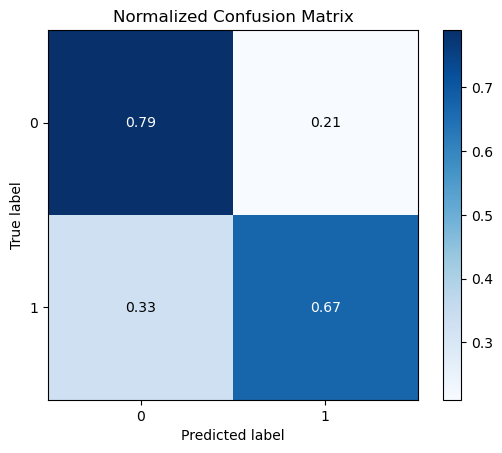

In [38]:
# Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_test, predictions, normalize=True)
plt.title("Normalized Confusion Matrix")
plt.show()


# Saving Results to CSV:

In [39]:
# Function to save test results to a CSV file
def save_results(X_test, y_test, predictions, proba_positive, filename):
    results_df = X_test.copy()
    results_df['True_Outcome'] = y_test
    results_df['Predicted_Outcome'] = predictions
    results_df['Probability_of_Outcome'] = proba_positive
    results_df.to_csv(filename, index=False)

# Save test results to a new CSV file
test_results_file = 'test_results.csv'
save_results(X_test, y_test, predictions, proba_positive, test_results_file)
